# Importing libraries

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# loading dataset


In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


(array([ 190., 1553., 4564., 1673., 1098., 2887., 6208., 2252.,  183.,
          32.]),
 array([-124.35 , -123.346, -122.342, -121.338, -120.334, -119.33 ,
        -118.326, -117.322, -116.318, -115.314, -114.31 ]),
 <a list of 10 Patch objects>)

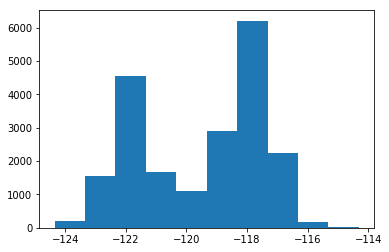

In [4]:
plt.hist(df['longitude'])

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


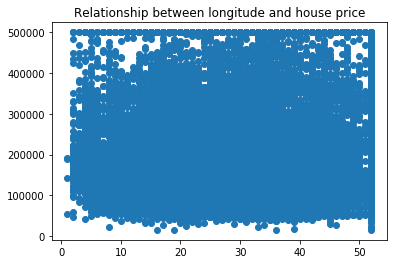

In [6]:
plt.scatter(df.housing_median_age,df.median_house_value)
plt.title("Relationship between longitude and house price")
plt.show()

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Dealing with missing Values

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Encoding Categorical Data

In [11]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
dummy = pd.get_dummies(df['ocean_proximity'],drop_first=True)
dummy.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [13]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df = pd.concat([df, dummy], axis=1)

In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [16]:
df.shape

(20640, 14)

In [17]:
df=df.drop(['latitude','longitude','ocean_proximity'],axis=1)

In [18]:
X = df.drop('median_house_value', axis=1)
y = df.median_house_value

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X=scaler.transform(X)

In [21]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=46)

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin = LinearRegression()

In [24]:
lin.fit(xtrain, ytrain)
predictions = lin.predict(xtest)

### RMSE Value for Linear Regression

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
print(sqrt(mean_squared_error(ytest, predictions)))

69736.43423025179


### Decison tree regressor and Random Forest regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [28]:
dtree_reg = DecisionTreeRegressor(max_depth=10)

In [29]:
dtree_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
pred = dtree_reg.predict(xtest)
print(sqrt(mean_squared_error(ytest, pred)))

73339.66173725651


In [31]:
dtree_reg = DecisionTreeRegressor(max_depth=20,max_features = 'sqrt',min_samples_leaf = 2,min_samples_split = 3,random_state= 42)
dtree_reg.fit(xtrain, ytrain)
pred = dtree_reg.predict(xtest)
print(sqrt(mean_squared_error(ytest, pred)))

83145.22967137938


In [32]:
wavg_pred = lin.predict(X)*0.1 + dtree_reg.predict(X)*0.9
wavg_pred

array([428330.76073346, 376400.92758981, 459867.62930683, ...,
        80196.31240614, 107305.5765961 ,  88263.02187812])

In [33]:
wavg_pred.shape

(20640,)